# Market Segmentation w/ Cluster Analysis

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.cluster import KMeans

---

# Load the Data

In [2]:
df = pd.read_csv("market_seg_clustering.csv")
df.head()

,Satisfaction,Loyalty
0,4,-1.33
1,6,-0.28
2,5,-0.99
3,7,-0.29
4,4,1.06


- Satisfaction is self-reported, discrete variable, takes integer values
- Brand loyalty is continuous, uses metrics like # of purchases divided over a period of time.

# Plot the Data

- plt.scatter(df['Satisfaction'], df['Loyalty'])

Text(0, 0.5, 'Loyalty')

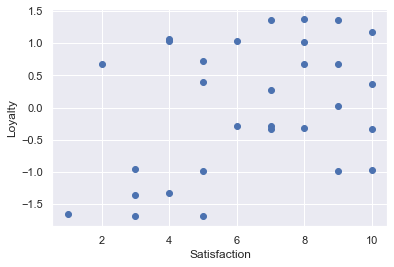

In [3]:
plt.scatter(data = df,
           x = 'Satisfaction',
           y = 'Loyalty')

#create x and y labels
plt.xlabel('Satisfaction')
plt.ylabel('Loyalty')

- Four segments appear:
    - Upper left: low satisfaction, high loyalty
    - Bottom left: low satisfaction, low loyalty
    - Upper right: high satisfaction, high loyalty
    - Bottom right: high satisfaction, low loyalty
    
- What could be causing the low loyalty amongst shoppers that are highly satisfied?
- How might the satisfaction of high loyalty customers with low satisfaction be improved?

# Select the Features

In [4]:
# create copy of data and create new variable
x = df.copy()

# Clustering

In [5]:
# create the model w/ 2 clusters
kmeans = KMeans(2)

# fit the model
kmeans.fit(x)

KMeans(n_clusters=2)

# Clustering Results

In [6]:
#create a duplicate of x for clusters
clusters = x.copy()

#create a predictions column for clusters
clusters['cluster_pred'] = kmeans.fit_predict(x)

Text(0, 0.5, 'Loyalty')

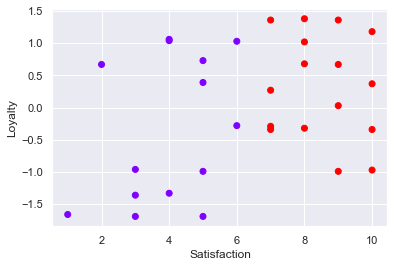

In [7]:
# create scatter plot 
plt.scatter(data = clusters,
           x = 'Satisfaction',
           y = 'Loyalty',
           c = 'cluster_pred',
           cmap = 'rainbow')

#create labels
plt.xlabel('Satisfaction')
plt.ylabel('Loyalty')

- There is a visible cutoff point at the level of 6 satisfaction, with clusters falling on either side of that satisfaction level. The algorithm appears to only have to seen satisfaction, because the variables were not standardized. K-Means disregarded Loyalty as a feature, to have both in consideration, there needs to be scaling.
- Both features seem equally important as features.

# Standardize the Variables

In [8]:
#import preprocessing library
from sklearn import preprocessing

#create new variable for scaled version of variable, standardizes w/mean of 0, and std dev of 1 by default
x_scaled = preprocessing.scale(x)

In [9]:
x_scaled

array([[-0.93138063, -1.3318111 ],
       [-0.15523011, -0.28117124],
       [-0.54330537, -0.99160391],
       [ 0.23284516, -0.29117733],
       [-0.93138063,  1.05964534],
       [-2.09560642, -1.6620122 ],
       [ 1.39707095, -0.97159172],
       [ 0.62092042, -0.32119561],
       [ 0.62092042,  1.01962097],
       [ 0.62092042,  0.67941378],
       [ 1.39707095, -0.3412078 ],
       [-0.54330537,  0.38923705],
       [-0.54330537, -1.69203048],
       [-1.70753116,  0.66940768],
       [ 0.23284516,  0.26916393],
       [ 1.00899568,  1.35982816],
       [ 0.62092042,  1.37984035],
       [ 0.23284516,  1.35982816],
       [ 0.23284516, -0.3412078 ],
       [ 1.00899568,  0.66940768],
       [ 1.39707095,  1.17971847],
       [-1.31945589, -1.69203048],
       [-0.93138063,  1.03963316],
       [-1.31945589, -0.96158562],
       [-0.15523011,  1.02962706],
       [ 1.00899568, -0.99160391],
       [ 1.39707095,  0.36922486],
       [ 1.00899568,  0.02901767],
       [-1.31945589,

- Loyalty was already scaled and remains the same. 
- Satisfaction score gets scaled accordingly.

# The Elbow Method

In [10]:
# Use elbow method to determine the appropriate number of clusters

# create an empty list
wcss = []

for i in range(1, 10): #will get 1 thru 9 clusters
    #create the model
    kmeans = KMeans(i)
    #fit model on x_scaled
    kmeans.fit(x_scaled)
    #append the results using the inertia method
    wcss.append(kmeans.inertia_)

In [11]:
wcss

[59.999999999999986,
 29.818973034723147,
 17.913349527387968,
 10.24718180592842,
 7.792695153937187,
 6.569489487091783,
 5.417308168183206,
 4.456070779602293,
 3.8473383323696226]

Text(0, 0.5, 'WCSS')

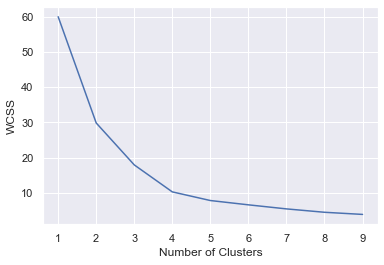

In [12]:
# plot the clusters

plt.plot(range(1,10), wcss)

#create labels
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')

- The inertia drops off in three or four places, 2, 3, 4, and 5.

### 2 Clusters w/ Scaled Data

In [13]:
# create the object
kmeans_new = KMeans(2)

# fit on scaled data
kmeans_new.fit(x_scaled)

#create new df called clusters_new containing values from x
clusters_new = x.copy()

#create new column for predictions
clusters_new['cluster_pred'] = kmeans_new.fit_predict(x_scaled)

In [14]:
# df contains original values but predicted clusters based on solution using standardized data
clusters_new.head()

,Satisfaction,Loyalty,cluster_pred
0,4,-1.33,0
1,6,-0.28,1
2,5,-0.99,0
3,7,-0.29,1
4,4,1.06,1


# Plot 2 Clusters

Text(0, 0.5, 'Loyalty')

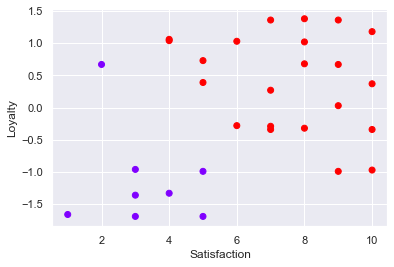

In [15]:
plt.scatter(data = clusters_new,
           x = 'Satisfaction',
           y = 'Loyalty',
           c = 'cluster_pred',
           cmap = 'rainbow')

#create labels
plt.xlabel('Satisfaction')
plt.ylabel('Loyalty')

- Two cluster solution does not make a lot of sense.
- Alienated: Low loyalty, low satisfaction customers, bottom left.
- Everything Else: High loyalty, high satisfaction. High satisfaction, low loyalty. Low satisfaction, high loyalty.

# 3 Clusters

In [16]:
#create object
kmeans_new = KMeans(3)

#fit object to scaled data
kmeans_new.fit(x_scaled)

#create new df called clusters_new containing values from x
clusters_new = x.copy()

#create new column for predictions on scaled data
clusters_new['cluster_pred'] = kmeans_new.fit_predict(x_scaled)

In [17]:
# df contains original values but predicted clusters based on solution using standardized data
clusters_new.head()

,Satisfaction,Loyalty,cluster_pred
0,4,-1.33,2
1,6,-0.28,1
2,5,-0.99,2
3,7,-0.29,1
4,4,1.06,0


# Plot 3 Clusters

Text(0, 0.5, 'Loyalty')

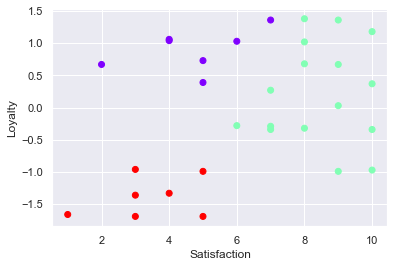

In [18]:
plt.scatter(data = clusters_new,
           x = 'Satisfaction',
           y = 'Loyalty',
           c = 'cluster_pred',
           cmap = 'rainbow')

plt.xlabel('Satisfaction')
plt.ylabel('Loyalty')

- The Alienated cluster remains the same.
- The Everything Else cluster has been broken up into two clusters
    - Supporters: Low to slightly above average satisfaction, high loyalty
    - All that remains: High satisfaction with satisfaction ranging on the higher and lower ends

# 4 Clusters

In [20]:
#create the object
kmeans_new = KMeans(4)

#fit object on scaled data
kmeans_new.fit(x_scaled)

#create new df called clusters_new containing values of x
clusters_new = x.copy()

#make column for predictions on scaled data
clusters_new['cluster_pred'] = kmeans_new.fit_predict(x_scaled)

# Plot 4 Clusters

Text(0, 0.5, 'Loyalty')

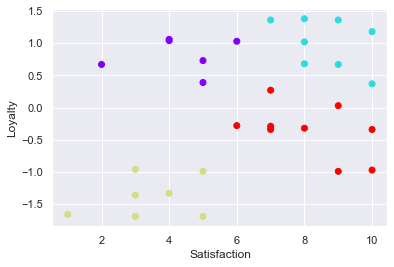

In [21]:
plt.scatter(data = clusters_new,
           x = 'Satisfaction',
           y = 'Loyalty',
           c = 'cluster_pred',
           cmap = 'rainbow')

plt.xlabel('Satisfaction')
plt.ylabel('Loyalty')

- Now there are four distinct clusters that can be well described on the Satisfaction x Loyalty spectrum

    - Alienated (Low, Low)
    - Fans (High, High)
    - Supporters (Low, High)
    - Roamers (High, Low)

# 5 Clusters

In [22]:
# create object
kmeans_new = KMeans(5)

#fit the object on scaled data
kmeans_new.fit(x_scaled)

#create new df with values of x
clusters_new = x.copy()

#make new column for predictions on scaled data
clusters_new['cluster_pred'] = kmeans_new.fit_predict(x_scaled)

# Plot 5 Clusters

Text(0, 0.5, 'Loyalty')

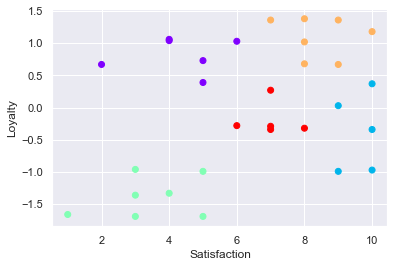

In [25]:
plt.scatter(data = clusters_new,
           x = 'Satisfaction',
           y = 'Loyalty',
           c = 'cluster_pred',
           cmap = 'rainbow')

plt.xlabel('Satisfaction')
plt.ylabel('Loyalty')

- Alienated, Supporters, and Fans remain the same.
- Roamers were split into two sub-clusters, those extremely satisfied, and those just satisfied. 
- Since there are four core clusters, and the sub-clusters of Roamers does not offer much new information, four clusters is probably ideal.

# 9 Clusters

In [26]:
#make the object
kmeans_new = KMeans(9)

#fit the object onto scaled data
kmeans_new.fit(x_scaled)

#create new df w/ values of x
clusters_new = x.copy()

#make new column for predictions of scaled data
clusters_new['cluster_pred'] = kmeans_new.fit_predict(x_scaled)

# Plot 9 Clusters

Text(0, 0.5, 'Loyalty')

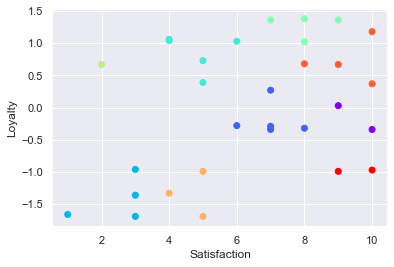

In [27]:
plt.scatter(data = clusters_new,
           x = 'Satisfaction',
           y = 'Loyalty',
           c = 'cluster_pred',
           cmap = 'rainbow')

plt.xlabel('Satisfaction')
plt.ylabel('Loyalty')

- Not much additional information can be gleaned, the four and five cluster solutions were the best. 